In [118]:
# Importing relevent packages

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

import datetime
from datetime import date
import time

import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv('C:\\Users\\lesedi msiya\\Desktop\\Level 2 Assesments\\L2T18\\imports.csv')
df

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,...,yearmonth,calendaryear,section,sectionanddescription,chapter,chapteranddescription,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,15180000,KG,3,...,201001,2010,3,3 - Animal or vegetable fats,15,15 - Animal and vegetable fats,15180000 - Animal Or Vegetable Fats And Oils A...,11.0,739,AFRICA
1,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,69120000,KG,3,...,201001,2010,13,13 - Stone & Glass,69,69 - Ceramic products,"69120000 - Ceramic Tableware, Kitchenware, Oth...",1.0,700,AFRICA
2,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,46021900,KG,3,...,201001,2010,9,9 - Wood Products,46,46 - Manufactures of straw,46021900 - Other,2.0,480,AFRICA
3,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,63071000,KG,3,...,201001,2010,11,11 - Textiles,63,63 - Made Up textile articles,"63071000 - Floor-Cloths, Dish-Cloths, Dusters ...",1.0,500,AFRICA
4,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,84099127,KG,3,...,201001,2010,16,16 - Machinery,84,"84 - Catalytic Converters, Computers and Mecha...","84099127 - Pistons, whether or not fitted with...",2.0,1000,AFRICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,39094090,KG,3,...,201003,2010,7,7 - Plastics & Rubber,39,39 - Plastics and articles thereof,39094090 - Other,10.0,10000,AFRICA
996,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,76051105,KG,3,...,201003,2010,15,15 - Products Iron & Steel,76,76 - Aluminium and Articles Thereof,"76051105 - Circular, in coils without spools, ...",800.0,29700,AFRICA
997,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,84749000,KG,3,...,201003,2010,16,16 - Machinery,84,"84 - Catalytic Converters, Computers and Mecha...",84749000 - Parts,1.0,36300,AFRICA
998,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,84183010,NO,3,...,201003,2010,16,16 - Machinery,84,"84 - Catalytic Converters, Computers and Mecha...",84183010 - Of which any wall thickness exceeds...,1.0,500,AFRICA


In [3]:
#viewing all the columns in the data
df.columns.unique()

Index(['tradetype', 'districtofficecode', 'districtofficename',
       'countryoforigin', 'countryoforiginname', 'countryofdestination',
       'countryofdestinationname', 'tariff', 'statisticalunit',
       'transportcode', 'transportcodedescription', 'yearmonth',
       'calendaryear', 'section', 'sectionanddescription', 'chapter',
       'chapteranddescription', 'tariffanddescription', 'statisticalquantity',
       'customsvalue', 'worldregion'],
      dtype='object')

This data is based on the imports from Lesotho to South Africa, some colums in the data contain the same values throughout for example 'tradetype' contains import in all the rows, this is repetative information that will not be needed for the analysis, this column and similar columns will be dropped.

In [4]:
# dropping columns
df.drop(['tradetype','countryoforigin','countryofdestination','transportcode','section','chapter','worldregion'], axis =1, inplace = True)
df

,districtofficecode,districtofficename,countryoforiginname,countryofdestinationname,tariff,statisticalunit,transportcodedescription,yearmonth,calendaryear,sectionanddescription,chapteranddescription,tariffanddescription,statisticalquantity,customsvalue
0,CLP,Caledonspoort,Lesotho,South Africa,15180000,KG,Road,201001,2010,3 - Animal or vegetable fats,15 - Animal and vegetable fats,15180000 - Animal Or Vegetable Fats And Oils A...,11.0,739
1,CLP,Caledonspoort,Lesotho,South Africa,69120000,KG,Road,201001,2010,13 - Stone & Glass,69 - Ceramic products,"69120000 - Ceramic Tableware, Kitchenware, Oth...",1.0,700
2,CLP,Caledonspoort,Lesotho,South Africa,46021900,KG,Road,201001,2010,9 - Wood Products,46 - Manufactures of straw,46021900 - Other,2.0,480
3,CLP,Caledonspoort,Lesotho,South Africa,63071000,KG,Road,201001,2010,11 - Textiles,63 - Made Up textile articles,"63071000 - Floor-Cloths, Dish-Cloths, Dusters ...",1.0,500
4,CLP,Caledonspoort,Lesotho,South Africa,84099127,KG,Road,201001,2010,16 - Machinery,"84 - Catalytic Converters, Computers and Mecha...","84099127 - Pistons, whether or not fitted with...",2.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CLP,Caledonspoort,Lesotho,South Africa,39094090,KG,Road,201003,2010,7 - Plastics & Rubber,39 - Plastics and articles thereof,39094090 - Other,10.0,10000
996,CLP,Caledonspoort,Lesotho,South Africa,76051105,KG,Road,201003,2010,15 - Products Iron & Steel,76 - Aluminium and Articles Thereof,"76051105 - Circular, in coils without spools, ...",800.0,29700
997,CLP,Caledonspoort,Lesotho,South Africa,84749000,KG,Road,201003,2010,16 - Machinery,"84 - Catalytic Converters, Computers and Mecha...",84749000 - Parts,1.0,36300
998,CLP,Caledonspoort,Lesotho,South Africa,84183010,NO,Road,201003,2010,16 - Machinery,"84 - Catalytic Converters, Computers and Mecha...",84183010 - Of which any wall thickness exceeds...,1.0,500


In [120]:
# checking if there is any missing data
missing = df.isnull().sum()
missing

tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin              0
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit             10
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
section                      0
sectionanddescription        0
chapter                      0
chapteranddescription        0
tariffanddescription         5
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

In [129]:
# handling missing data
#imputating missing values in statistical unit with the mode value of the column
unit = df['statisticalunit'].mode()
missing_unit = df['statisticalunit'].fillna('KG')

# imputating missing values in tariffanddescription
tariff = df['tariffanddescription'].mode()
missing_tariff = df['tariffanddescription'].fillna('6810110-Buliding Blocks And Bricks')

The missing values in statistical unit was replaced by the mode which is KG, and the missing values in tariff and description was replaced by the mode was well which is 6810110-Bulinding Blocks And Bricks

In [77]:
# checking if there are duplicated rows
duplicate = df[df.duplicated()]
num_dupli = duplicate.count()
print(num_dupli)
print(duplicate)

districtofficecode          0
districtofficename          0
countryoforiginname         0
countryofdestinationname    0
tariff                      0
statisticalunit             0
transportcodedescription    0
yearmonth                   0
calendaryear                0
sectionanddescription       0
chapteranddescription       0
tariffanddescription        0
statisticalquantity         0
customsvalue                0
dtype: int64
Empty DataFrame
Columns: [districtofficecode, districtofficename, countryoforiginname, countryofdestinationname, tariff, statisticalunit, transportcodedescription, yearmonth, calendaryear, sectionanddescription, chapteranddescription, tariffanddescription, statisticalquantity, customsvalue]
Index: []


There are no duplicated rows in this data. 

<AxesSubplot:xlabel='count', ylabel='districtofficename'>

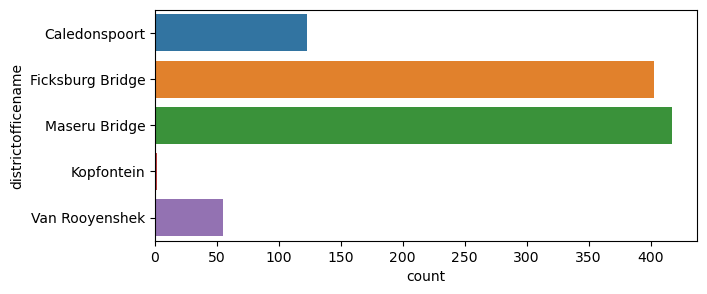

In [109]:
#analysing the district name column
fig = plt.figure(figsize=(7,3))
sns.countplot(y ='districtofficename',data = df)

Maseru Bridge is the district where most imports from Lesotho come from.

array([<AxesSubplot:ylabel='tradetype'>], dtype=object)

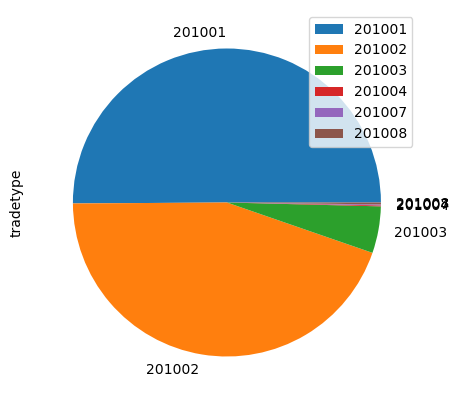

In [84]:
#analying the year month data
group_by_year = df.groupby(by=['yearmonth'])

yearcount = group_by_year.count()

yearcount = pd.DataFrame(yearcount.iloc[:,0])

yearcount.rename(columns={'districtofficecode': 'yearmonth'}, inplace=True)

yearcount.plot.pie(subplots=True,figsize=(5,5))

From the data we see that imports only happen for 6 months of the year, the months where most imports happen is January (201001).

<AxesSubplot:xlabel='count', ylabel='sectionanddescription'>

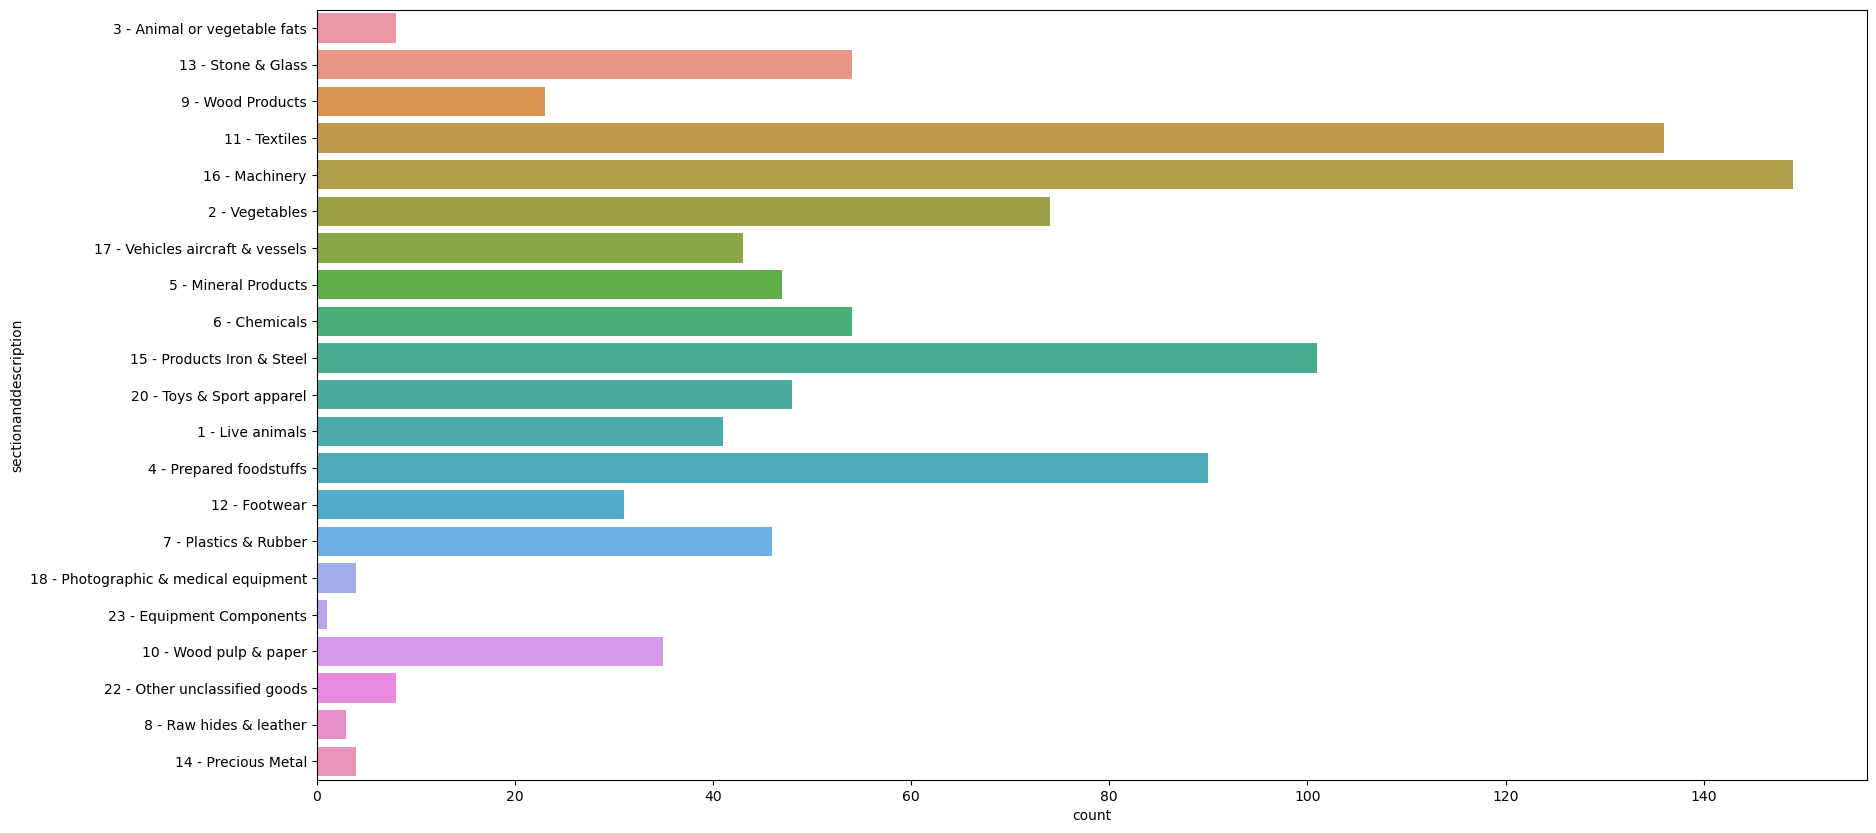

In [100]:
# Analysing Section and description
fig = plt.figure(figsize=(20,10))
sns.countplot(y ='sectionanddescription',data = df)

The most frequent products to be imported from Lesotho to South Africa are machinery, textiles and iron and steel products. This may mean that South Africa does not have enough companies that produce machinery or there is was a high demand for these products and imports were needed to help meet these demands, textiles and iron and steel products hence they purchase these from Lesotho, it may also be that products from Lesotho are cheaper than those from local manufacturers. South Africa was hosting the world cup in 2010 perhaps the machinery was needed for construction, and textiles for buildings and renovation for tourisim purposes.

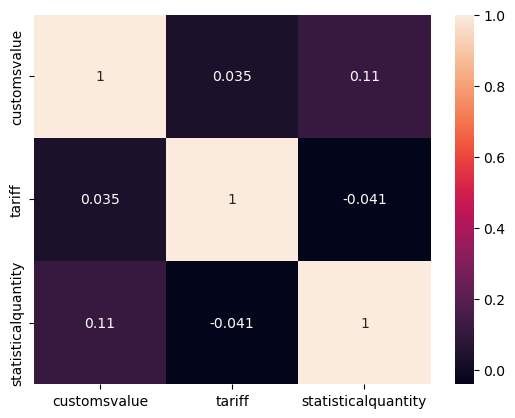

In [102]:
# analysing the correlation between customs value, tariff and statistical quantity
compare_corr = df[['customsvalue','tariff','statisticalquantity']]
plt.figure()
correlation = compare_corr.corr()
sns.heatmap(correlation, annot= True)
plt.show()

The correlation between customs value and statistical quantity is not very high however is does show that the quantity does affect the customs value.The correlation between customs value and tariff is low which shows that the tariff charged on goods is not directly related to the custom value of the goods, lastly the tariff and statistical quantity have a negative correlation which shows that they do not depend on each other in any significant way.

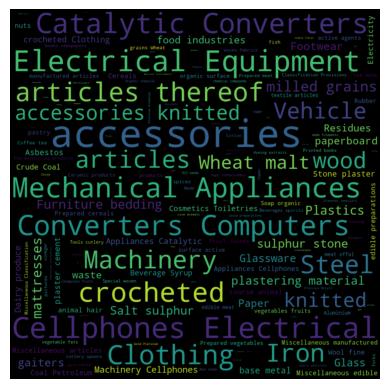

In [104]:
# analysing the description of products 
import wordcloud
from wordcloud import WordCloud

description = df['chapteranddescription'].astype('string')
text = description
text = " ".join(i for i in text)
wordcloud = WordCloud(width =1000, height =1000, margin=10).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x= 0, y= 0)
plt.show()

The word cloud above shows the description of the items that are imported to South Africa, the items that are mostly imported are mechanical appliances, converters , computers, machinery, cellphones, clothing, iron, electrical equiptment ,catalytic converters,wood,etc. products that are less frequently imported are paper, glassware, sulphur,stone,asbestos, crude, coal,waste, etc.

<AxesSubplot:xlabel='sectionanddescription', ylabel='customsvalue'>

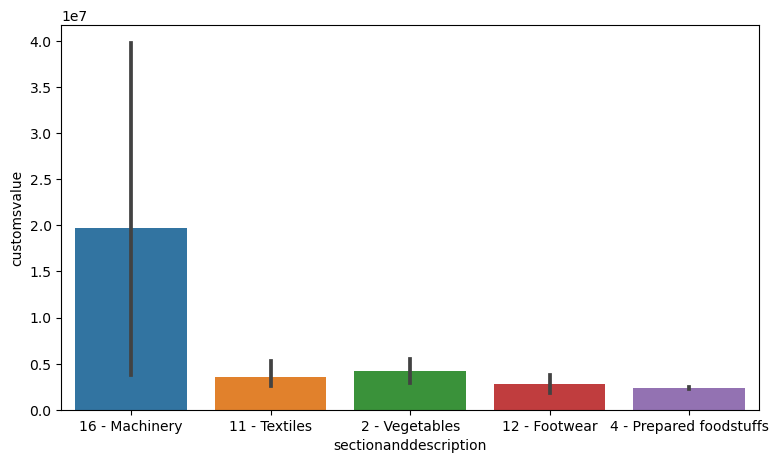

In [126]:
# finding the top 5 products with high customs value
expensive = df.sort_values(by='customsvalue', ascending = False).head(20)
expensive_products = pd.DataFrame(expensive, columns=['customsvalue','sectionanddescription'])
fig = plt.figure(figsize=(9,5))
sns.barplot(data= expensive_products, x = 'sectionanddescription', y = 'customsvalue')


Machinery has the highest customs value in the data, this makes sense as most machinery is generally expensive, vegetables have the second highest customs value, generally vegetables do not cost more than textiles and footwear, perhaps in this data they are expensive because they might have been bought in bulk.

<AxesSubplot:ylabel='Quantity'>

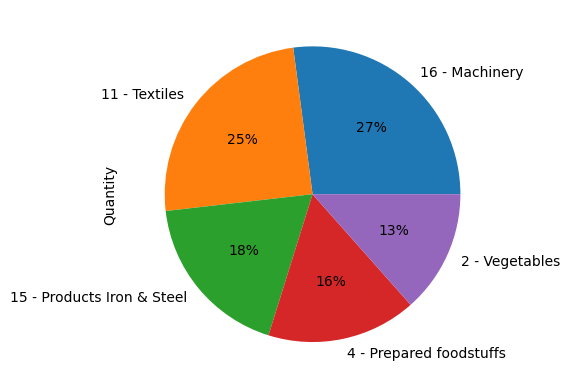

In [91]:
#analysing products with the highest quantity
df_1 = df.groupby(by='sectionanddescription')
df_count = df_1.count()
quantity = df_count.sort_values(by='statisticalquantity', ascending =False).head()
quantity = quantity['statisticalquantity']
quantity.plot(kind='pie', ylabel ='Quantity', autopct ='%.0f%%')

Machinery has the highest quantity which also explains why is has high customs value since we observed in the heat map above that quantity does correlate (0.11) with customs value , it makes sense that products with high quantity can also have high customs value. the second product with high quanity is textiles followed by products of iron and steel. Products of iron and steel have high quantities but low customs value, this can aslo be expected as the correlation between customs value and quanitity is only 0.11, perhaps these products of iron and steel are used goods.
Vegetables has the lowest quantity out of the top 5, but has customs value that is higher than textiles and prepared foods, this may be because of some value in the vegetables like the soil type and climate in Lesotho, this could also be due to a high demand of vegetables in South Africa.

<AxesSubplot:xlabel='sectionanddescription', ylabel='tariff'>

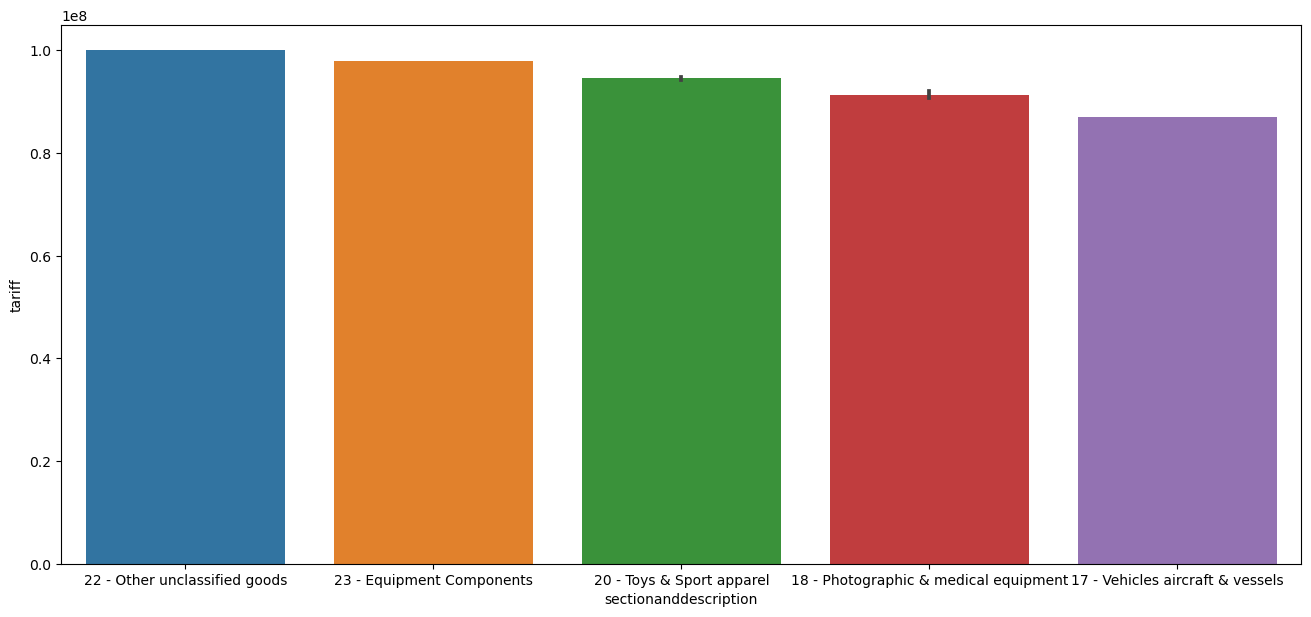

In [13]:
#analysing top 5 goods with the highest traiffs
tax_df = df.sort_values(by='tariff', ascending = False).head(100)
tax_df.groupby(by ='sectionanddescription')
tax_df.count()
tax = pd.DataFrame(tax_df, columns =['tariff', 'sectionanddescription'])
fig = plt.figure(figsize=(16,7))
sns.barplot(data= tax, x= 'sectionanddescription', y = 'tariff')

The products with the highest tariffs are unclassified goods, followed by equipment, toys and sport apparel and photographic and medical equiptment, we observe that the products with the highest tariff are not the same as the ones with the highest customs value, this is expected as the correlation between tariff and customs value is only 0.035


<Figure size 640x480 with 0 Axes>

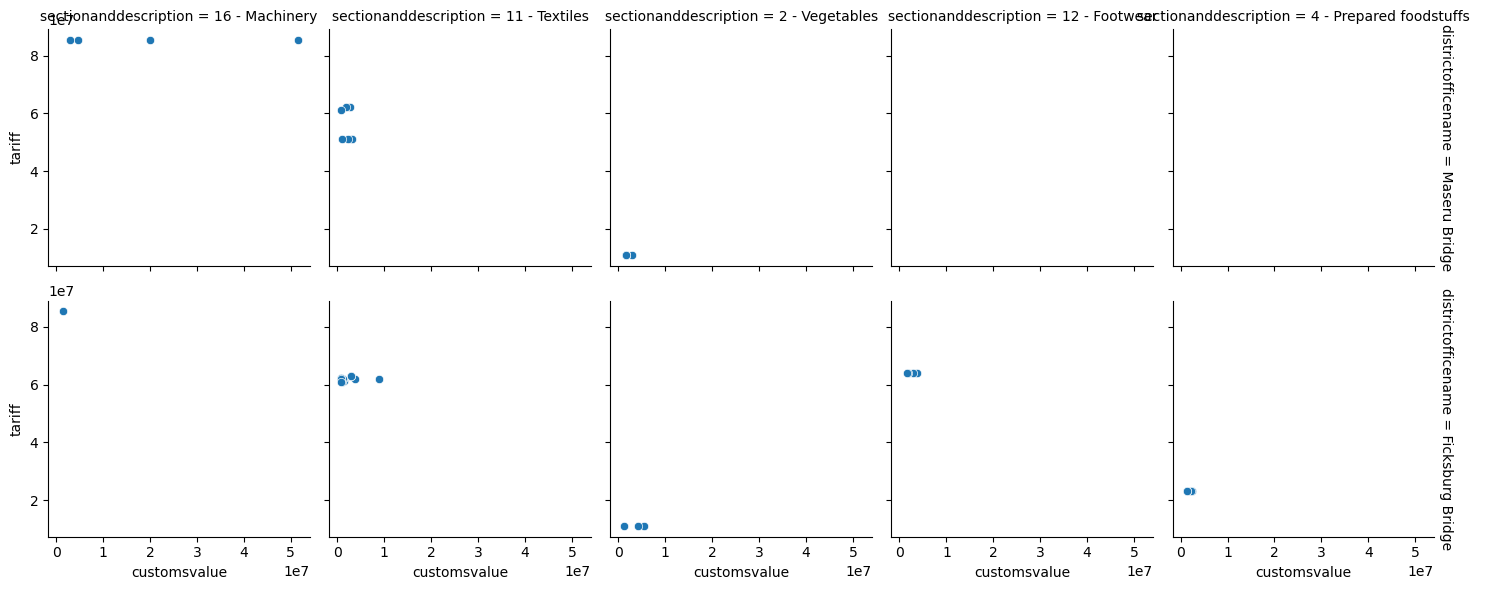

<Figure size 6000x4000 with 0 Axes>

In [128]:
# using a scatter plot to analyse the products with the highest customs value and their tariffs and which district they came from
plt.figure()
scatter = df.sort_values(by = 'customsvalue', ascending = False).head(38)
fg =sns.FacetGrid(scatter, col = 'sectionanddescription', row = 'districtofficename',
                 margin_titles = True)
fg.map(sns.scatterplot, 'customsvalue', 'tariff')
fig = plt.figure(figsize=(60,40))
fg.add_legend()
plt.show()


From the scatter plot we observe that most products come mainly from Maseru Bridge and Ficksburg Bridge, Machinery mostly comes from Maseru Bridge as well as some textiles and vegetables, most textiles,footwear and prepared foods come from Ficksburg Bridge, from the scatter plot we also observe that vegetables have low tariffs as compared to the other products. Most machinery and textiles may be produced near Maseru bridge, there could be an industrial area nead Maseru bridge, most prepared food and vegetables are imported from Fiscksburg bridge this could mean that there is an agricultural area near Ficksburg bridge.

<AxesSubplot:xlabel='yearmonth', ylabel='count'>

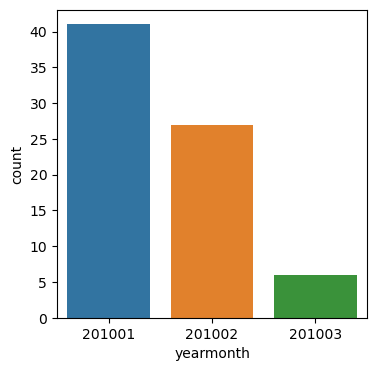

In [113]:
#analysing the months vegtables were sold in 
period = df[df['sectionanddescription']=='2 - Vegetables']
period1 = period.groupby(by='yearmonth')
fig = plt.figure(figsize=(4,4))
sns.countplot(x ='yearmonth',data = period)

Vegetables were imported mostly in summer, this could mean certain crops that grow well in Lesotho during these months because of favourable conditions that Lesotho might have such as soil type and climatic conditions or this could mean there was a high demand for vegetables in South Africa and they needed more imports to meet their demand ,most vegetables were imported in January.

<AxesSubplot:xlabel='count', ylabel='yearmonth'>

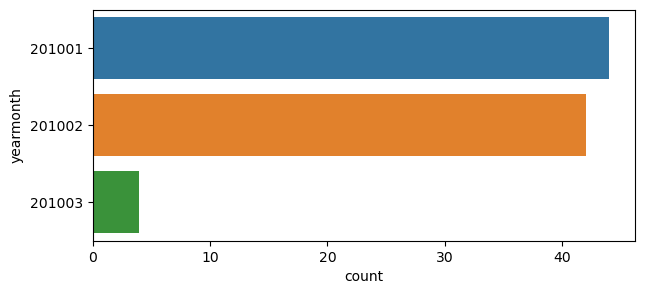

In [110]:
# analysing the period when most prepared foods were imported
prepared_foods = df[df['sectionanddescription']=='4 - Prepared foodstuffs']
fig = plt.figure(figsize=(7,3))
sns.countplot(y ='yearmonth',data = prepared_foods)

Most prepared foods were imported in January and February, this may be because there was a high demand for prepared foods for South Aficans located around the Ficksburg bridge, another possiblitiy is that perhaps there was alot of travel around that area or alot of work such as construction work since 2010 was the year of the world cup in South Africa, there was alot of work and travelling during this time. 